In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import data_analysis_utilitites as da_utilities
import data_analysis_areas as da_area
from scipy.stats import shapiro, levene
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import numpy as np

In [49]:
data = da_utilities.load_all_criticality_data_no_duplicate_files('/home/bellijjy/criticality_analysis', ['_con', '_dav', '_dud', '_Cor', '_cha'], area=None, state=None, day=None, epoch=None, time_chunk=None)

In [86]:
def load_from_parquet(file_path):
    """
    Loads a DataFrame from a Parquet file.

    Parameters:
    -----------
    file_path : str
        The path to the Parquet file.

    Returns:
    --------
    pd.DataFrame
        A DataFrame containing the data loaded from the Parquet file.
    """
    
    try:
        df = pd.read_parquet(file_path)
        return df
    except Exception as e:
        print(f"Failed to load data from {file_path}. Error: {e}")
        return None
    
complete_data = load_from_parquet('/home/bellijjy/completedataframe')
complete_data

,animal,area,state,day,epoch,time_chunk,tau,branching_factor,data,dt,...,y_position,head_direction,speed,track_segment_id,linear_velocity,labeled_segments,linear_distance,arm_name,linear_position,linear_speed
0,con,CA3,sleep,4,5,31,809.383114,0.998765,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
1,con,CA3,wake,5,4,26,407.667742,0.997550,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
2,con,CA3,wake,3,2,4,381.053557,0.997379,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000467,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
3,con,CA1,sleep,1,5,19,122.227841,0.991852,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",1.000434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
4,con,CA3,sleep,2,1,6,13.013210,0.926033,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,cha,CA1,sleep,4,3,29,6.195645,0.850948,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
5231,cha,CA1,wake,2,4,6,112.422062,0.991144,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.999967,...,96.150239,-0.438341,0.792830,1.000000,-0.388967,2.000000,32.193149,Center Arm,164.596393,0.739960
5232,cha,CA3,sleep,5,3,10,9.780898,0.902813,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
5233,cha,CA1,wake,5,2,29,1142.061000,0.999125,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,...,123.282405,-0.004723,10.604992,2.335189,-2.951429,2.064588,96.036485,Left Arm,205.102751,8.648989


In [9]:
def add_distance_to_criticality_column(df, branching_factor_column='branching_factor'):
    """
    Add a new column to the DataFrame that calculates the distance to criticality.
    
    Parameters:
    - df: DataFrame, the input DataFrame
    - branching_factor_column: str, the column name containing branching factor values
    
    Returns:
    - DataFrame with an additional 'distance_to_criticality' column
    """
    df['distance_to_criticality'] = np.log(1 - df[branching_factor_column])
    return df

# Add the distance_to_criticality column to the DataFrame


In [72]:
formula = "distance_to_criticality ~ area * linear_distance * linear_speed"
formulas_reduced = ["distance_to_criticality ~ linear_distance * linear_speed", "distance_to_criticality ~ linear_distance * area", "distance_to_criticality ~ area * linear_speed"]

In [76]:
from scipy.stats import chi2

def compare_models(base_formula, reduced_formulas, data, groups):
    """
    Compare a base mixed-effects model to several reduced models using likelihood ratio tests. Use the ML instead of the REML
    as the ML partializes the fixed effects out -- and it is precisely those that are of interest.
    
    Parameters:
    - base_formula: str, formula for the base model
    - reduced_formulas: list of str, formulas for the reduced models
    - data: DataFrame, the data
    - groups_column: str, the column name to use for groups (random effects)
    
    Returns:
    - dict, Likelihood ratio statistics, p-values, degrees of freedom for each reduced model
    """
    
    # Fit the base model and obtain its log-likelihood
    base_model = smf.mixedlm(base_formula, data=data, groups=groups)
    base_fit_result = base_model.fit(reml = False)
    base_loglike = base_fit_result.llf
    
    # Initialize a dictionary to store comparison results
    comparison_results = {}
    
    # Loop through each reduced formula and compare to the base model
    for formula_i in reduced_formulas:
        # Fit the reduced model and obtain its log-likelihood
        model_i = smf.mixedlm(formula_i, data=data, groups=groups)
        fit_result_i = model_i.fit(reml = False)
        reduced_loglike = fit_result_i.llf
        
        # Manually calculate the likelihood ratio test statistic
        lr_stat = -2 * (reduced_loglike - base_loglike)
        
        # Calculate the p-value
        df_diff = base_fit_result.df_modelwc - fit_result_i.df_modelwc
        p_value = chi2.sf(lr_stat, df_diff)
        
        #Store the results along with AIC and BIC
        comparison_results[formula_i] = {
            'LR Statistic': lr_stat, 
            'p-value': p_value, 
            'df difference': df_diff   
        }
        
    return comparison_results

# Sample function call (Note: This is a placeholder; actual data would be used in practice)
results = compare_models(formula, formulas_reduced, filtered_df, groups= filtered_df['animal'])
results

/home/bellijjy/.local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/bellijjy/.local/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/bellijjy/.local/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/home/bellijjy/.local/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2055: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/home/bellijjy/.local/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/ho

{'distance_to_criticality ~ linear_distance * linear_speed': {'LR Statistic': 94.11316271663418,
  'p-value': 1.759297362634359e-19,
  'df difference': 4},
 'distance_to_criticality ~ linear_distance * area': {'LR Statistic': -inf,
  'p-value': 1.0,
  'df difference': 4},
 'distance_to_criticality ~ area * linear_speed': {'LR Statistic': 18.032819827360072,
  'p-value': 0.001216004038543362,
  'df difference': 4}}

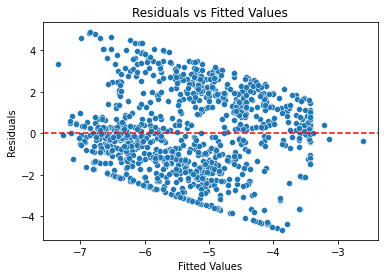

Pearson correlation between residuals and fitted values: 0.003933605476538106
Spearman correlation between residuals and fitted values: 0.050567305640627835


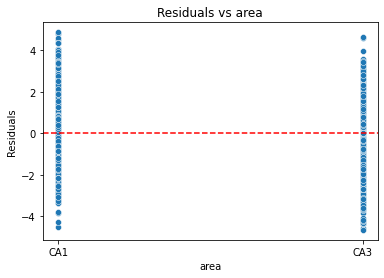

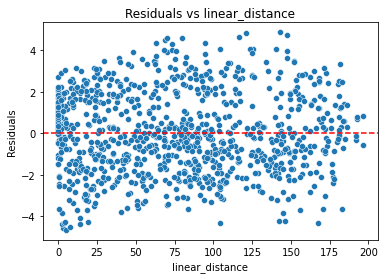

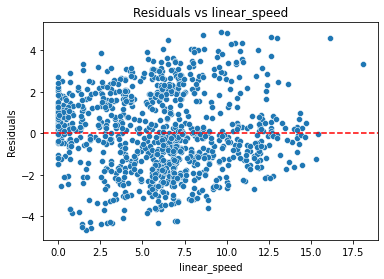

In [60]:
from scipy.stats import spearmanr, pearsonr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def check_linearity(fit_result, data, dependent_var, predictors):
    """
    Check the linearity assumption of a mixed-effects model by plotting residuals vs fitted values
    and residuals vs each predictor, and by calculating correlation coefficients.
    
    Parameters:
    - fit_result: mixedlm fit result object, the fitted mixed-effects model
    - data: DataFrame, the original data
    - dependent_var: str, the dependent variable
    - predictors: list of str, the predictor variables
    
    Returns:
    - None, but plots graphs for visual inspection and prints correlation coefficients
    """
    
    # Extract residuals and fitted values
    residuals = fit_result.resid
    fitted_vals = fit_result.fittedvalues
    
    # Check if the order of the indices matches
    if not data.index.unique().equals(residuals.index.unique()):
        raise IndexError('The index order is shuffled')
    
    # Add residuals and fitted values back to the original data
    data_with_residuals = data.copy()
    data_with_residuals['residuals'] = residuals.values
    data_with_residuals['fitted_vals'] = fitted_vals.values
    
    # Plot residuals vs fitted values
    plt.figure()
    sns.scatterplot(x='fitted_vals', y='residuals', data=data_with_residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Residuals vs Fitted Values")
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    plt.show()
    
    # Calculate Pearson and Spearman correlation for residuals vs fitted values
    pearson_corr, _ = pearsonr(data_with_residuals['fitted_vals'], data_with_residuals['residuals'])
    spearman_corr, _ = spearmanr(data_with_residuals['fitted_vals'], data_with_residuals['residuals'])
    print(f"Pearson correlation between residuals and fitted values: {pearson_corr}")
    print(f"Spearman correlation between residuals and fitted values: {spearman_corr}")
    
    # Plot residuals vs each predictor and calculate correlation coefficients
    for predictor in predictors:
        plt.figure()
        sns.scatterplot(x=predictor, y='residuals', data=data_with_residuals)
        plt.axhline(0, color='red', linestyle='--')
        plt.title(f"Residuals vs {predictor}")
        plt.xlabel(predictor)
        plt.ylabel("Residuals")
        plt.show()

check_linearity(fit_result_ml, filtered_df, dependent_var='distance_to_criticality', predictors=['area', 'linear_distance', 'linear_speed'])



In [90]:
formula = "distance_to_criticality ~ area * linear_speed * linear_distance"
df_with_distance = add_distance_to_criticality_column(complete_data, branching_factor_column='branching_factor')

filtered_df = df_with_distance[df_with_distance['linear_speed'].notna()]

model_with_ml = smf.mixedlm(formula, data=filtered_df, groups= filtered_df['animal'])

fit_result_ml = model_with_ml.fit(reml = False)
        
display(fit_result_ml.summary())

                       Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      distance_to_criticality
No. Observations:      981          Method:                  ML                     
No. Groups:            2            Scale:                   3.7039                 
Min. group size:       264          Log-Likelihood:          -2037.2736             
Max. group size:       717          Converged:               Yes                    
Mean group size:       490.5                                                        
------------------------------------------------------------------------------------
                                         Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------
Intercept                                -4.031    0.386 -10.444 0.000 -4.787 -3.274
area[T.CA3]                               1.007    0.327   3.082 0.002  0.366  1.647
line

Group: ('Cor', 'CA1', Interval(-0.196, 19.617, closed='right'), Interval(-0.0181, 0.951, closed='right')), Shapiro-Wilk test for normality: Test Statistic = 0.8749348521232605, p-value = 0.0004549113509710878
Group: ('Cor', 'CA1', Interval(-0.196, 19.617, closed='right'), Interval(0.951, 1.902, closed='right')), Shapiro-Wilk test for normality: Test Statistic = 0.9360650181770325, p-value = 0.5101143717765808
Group: ('Cor', 'CA1', Interval(-0.196, 19.617, closed='right'), Interval(1.902, 2.853, closed='right')), Shapiro-Wilk test for normality: Test Statistic = 0.9237097501754761, p-value = 0.3181597590446472
Group: ('Cor', 'CA1', Interval(-0.196, 19.617, closed='right'), Interval(2.853, 3.804, closed='right')), Shapiro-Wilk test for normality: Test Statistic = 0.9060400128364563, p-value = 0.08578091859817505
Group: ('Cor', 'CA1', Interval(-0.196, 19.617, closed='right'), Interval(3.804, 4.755, closed='right')), Shapiro-Wilk test for normality: Test Statistic = 0.8980228900909424, p-v

<ipython-input-71-3236d0a5d3f9>:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Group: ('Cor', 'CA1', Interval(78.469, 98.087, closed='right'), Interval(6.656, 7.607, closed='right')), Shapiro-Wilk test for normality: Test Statistic = 0.8660343885421753, p-value = 0.08984784781932831
Group: ('Cor', 'CA1', Interval(98.087, 117.704, closed='right'), Interval(6.656, 7.607, closed='right')), Shapiro-Wilk test for normality: Test Statistic = 0.8854652047157288, p-value = 0.34062397480010986
Group: ('Cor', 'CA1', Interval(117.704, 137.321, closed='right'), Interval(5.706, 6.656, closed='right')), Shapiro-Wilk test for normality: Test Statistic = 0.9837883710861206, p-value = 0.9238576292991638
Group: ('Cor', 'CA1', Interval(117.704, 137.321, closed='right'), Interval(7.607, 8.558, closed='right')), Shapiro-Wilk test for normality: Test Statistic = 0.7530829906463623, p-value = 0.00681220181286335
Group: ('Cor', 'CA1', Interval(137.321, 156.939, closed='right'), Interval(3.804, 4.755, closed='right')), Shapiro-Wilk test for normality: Test Statistic = 0.8878042697906494,

<Figure size 432x288 with 0 Axes>

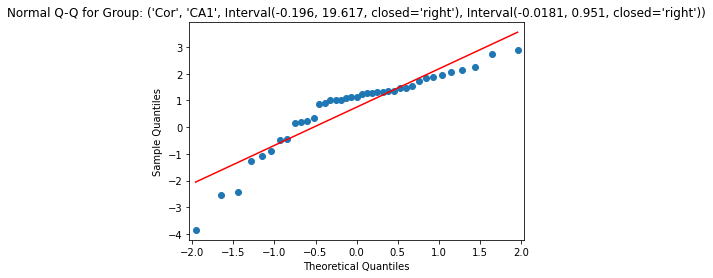

<Figure size 432x288 with 0 Axes>

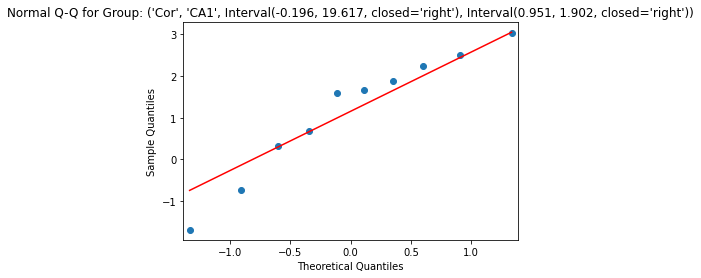

<Figure size 432x288 with 0 Axes>

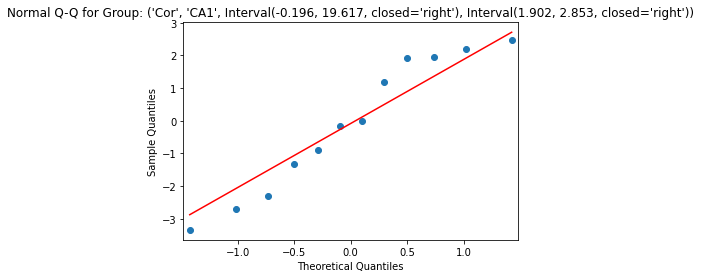

<Figure size 432x288 with 0 Axes>

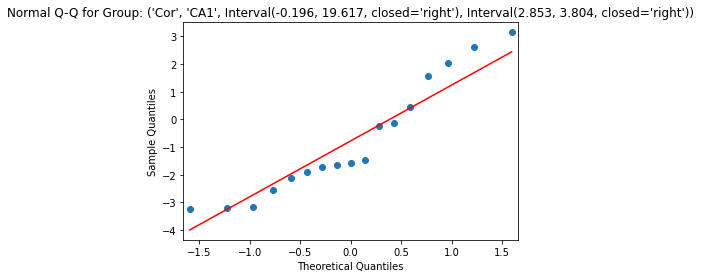

<Figure size 432x288 with 0 Axes>

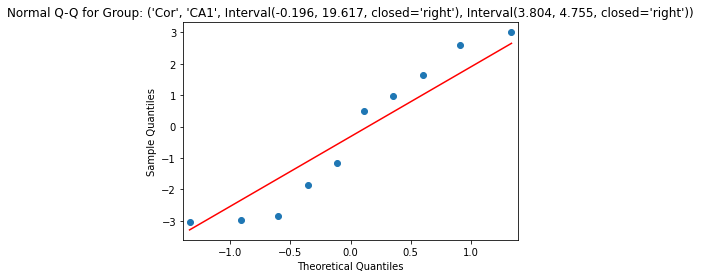

<Figure size 432x288 with 0 Axes>

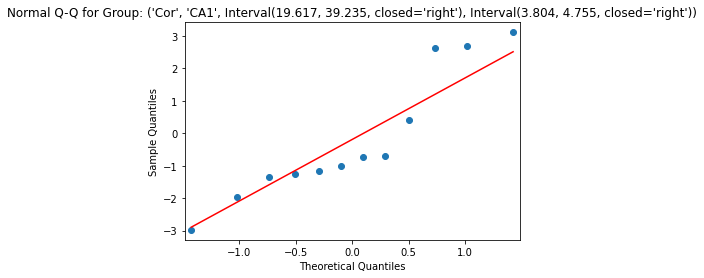

<Figure size 432x288 with 0 Axes>

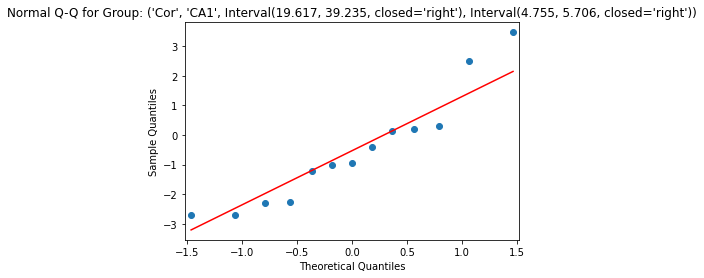

<Figure size 432x288 with 0 Axes>

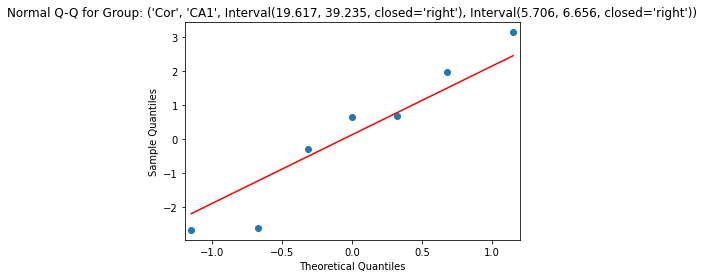

<Figure size 432x288 with 0 Axes>

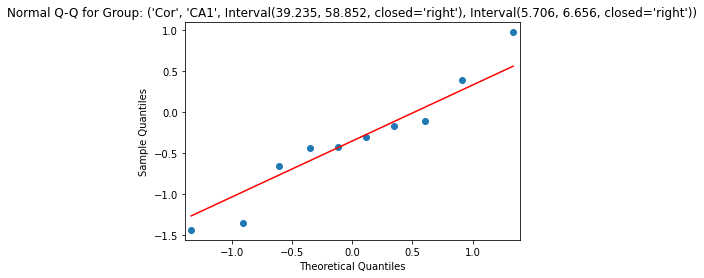

<Figure size 432x288 with 0 Axes>

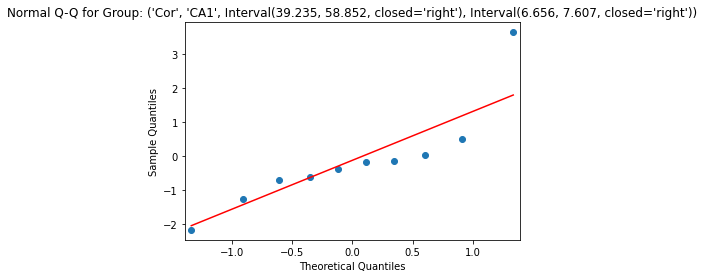

<Figure size 432x288 with 0 Axes>

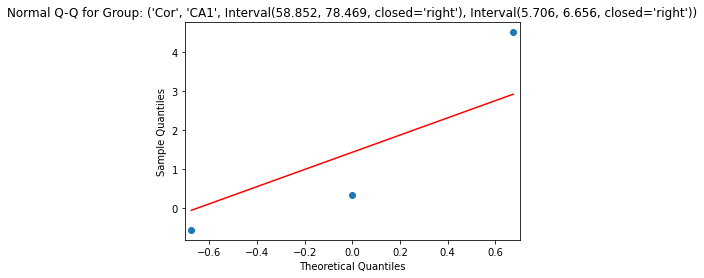

<Figure size 432x288 with 0 Axes>

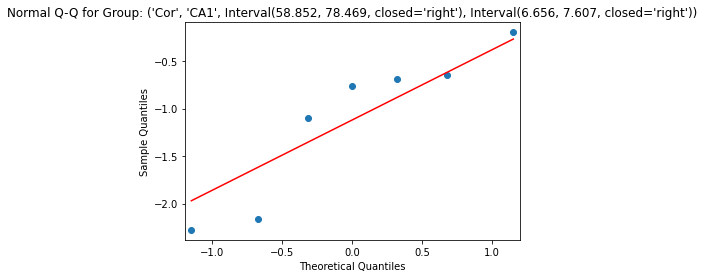

<Figure size 432x288 with 0 Axes>

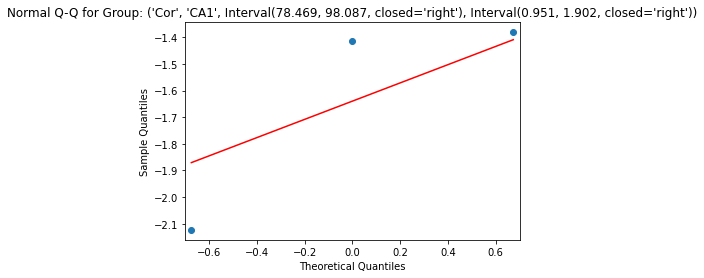

<Figure size 432x288 with 0 Axes>

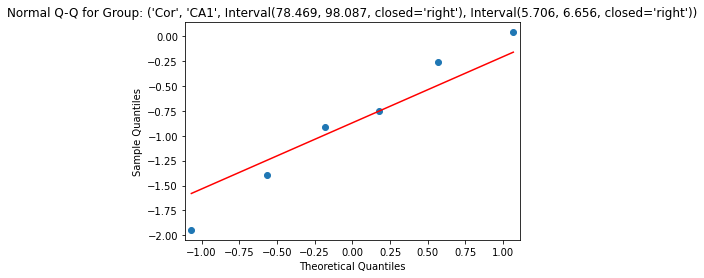

<Figure size 432x288 with 0 Axes>

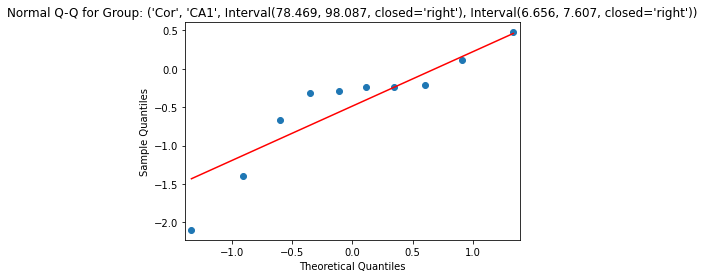

<Figure size 432x288 with 0 Axes>

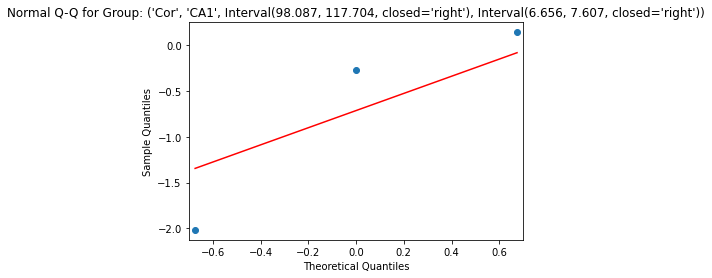

<Figure size 432x288 with 0 Axes>

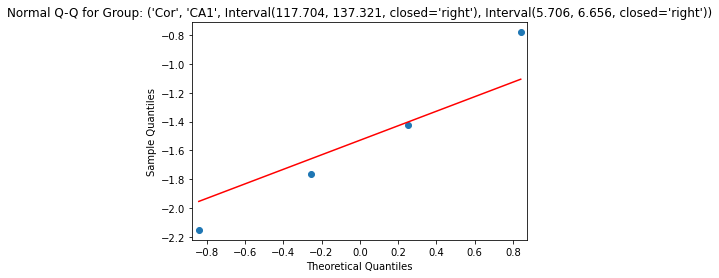

<Figure size 432x288 with 0 Axes>

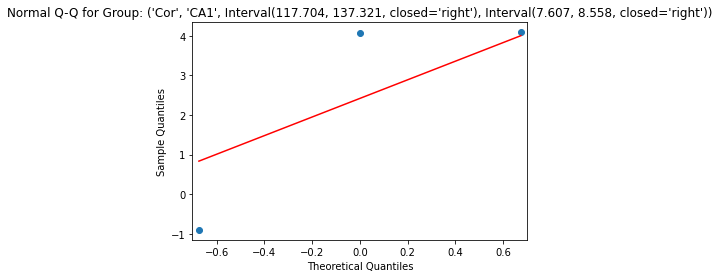

<Figure size 432x288 with 0 Axes>

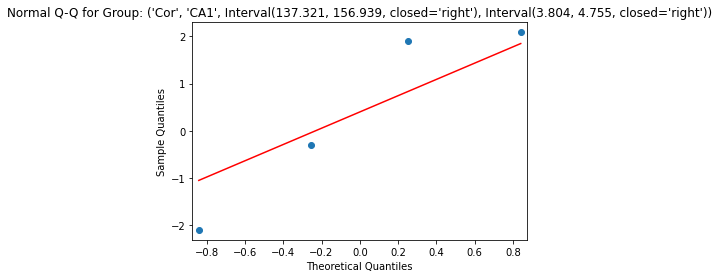

<Figure size 432x288 with 0 Axes>

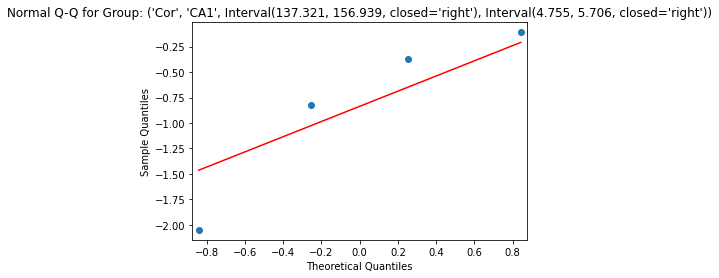

<Figure size 432x288 with 0 Axes>

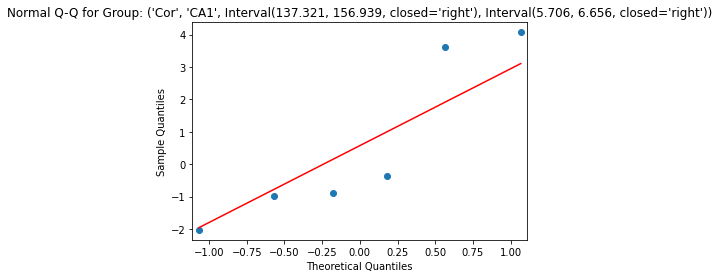

<Figure size 432x288 with 0 Axes>

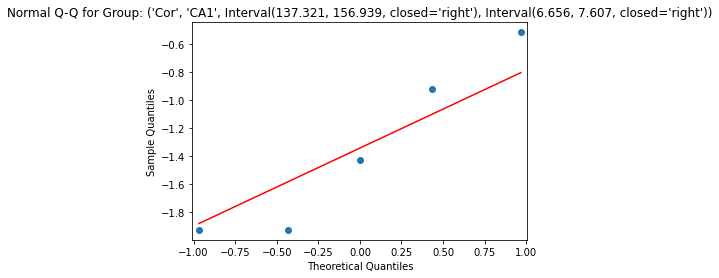

<Figure size 432x288 with 0 Axes>

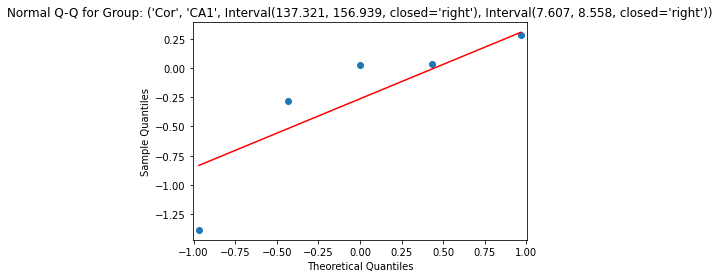

<Figure size 432x288 with 0 Axes>

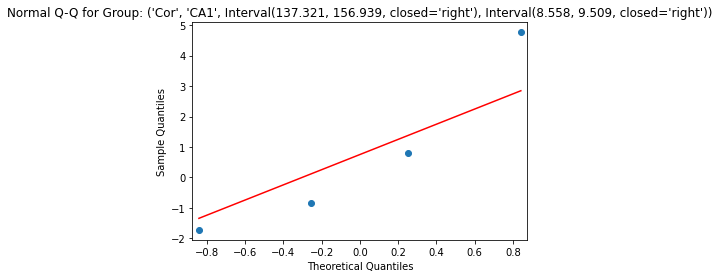

<Figure size 432x288 with 0 Axes>

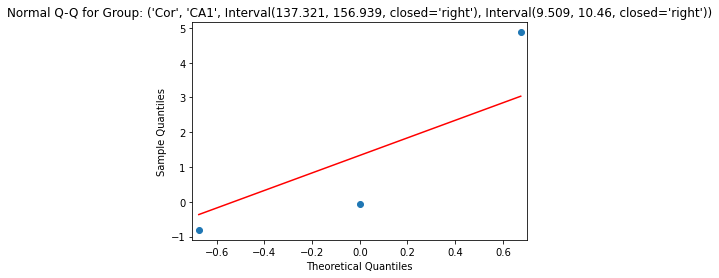

<Figure size 432x288 with 0 Axes>

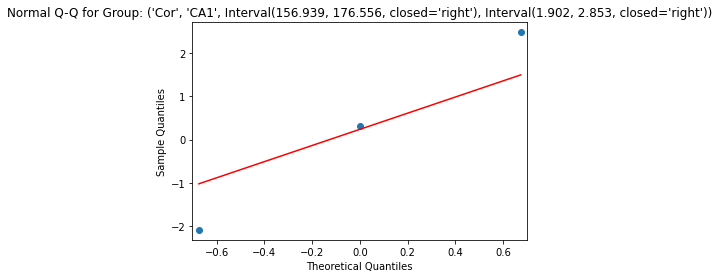

<Figure size 432x288 with 0 Axes>

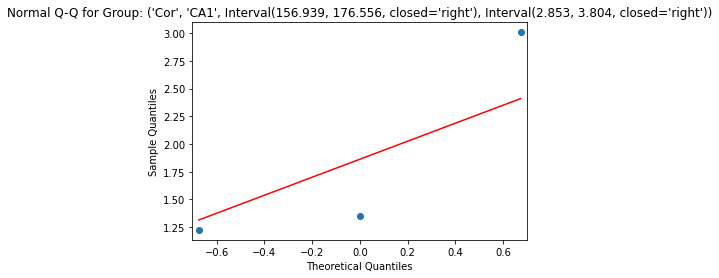

<Figure size 432x288 with 0 Axes>

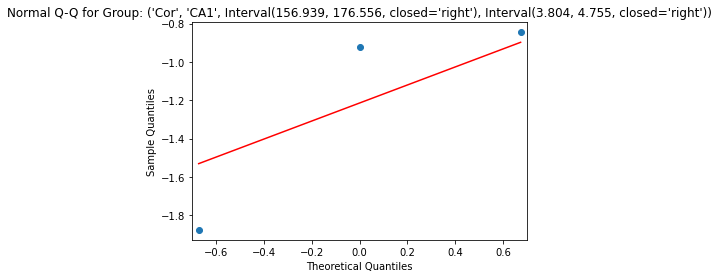

<Figure size 432x288 with 0 Axes>

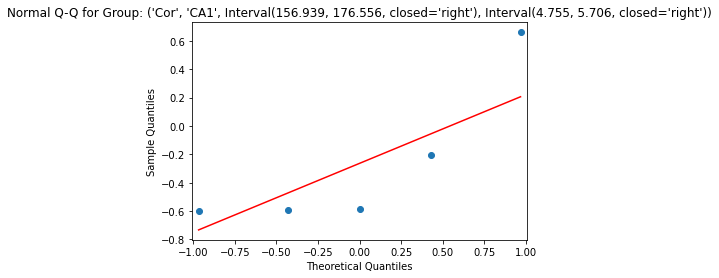

<Figure size 432x288 with 0 Axes>

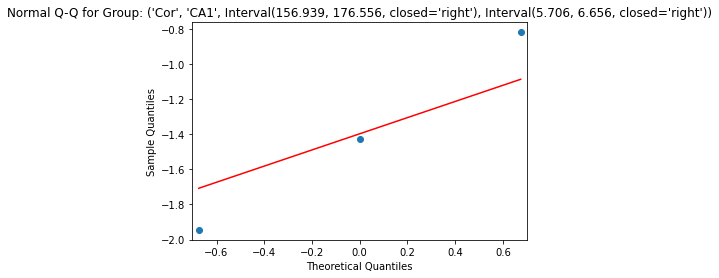

<Figure size 432x288 with 0 Axes>

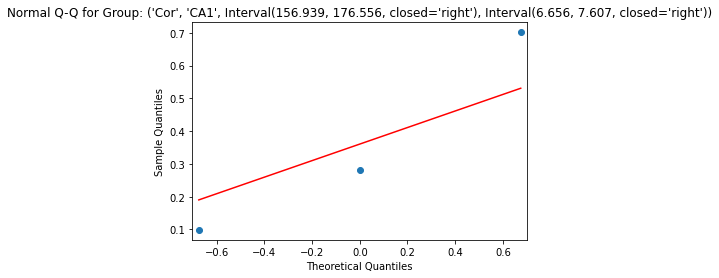

<Figure size 432x288 with 0 Axes>

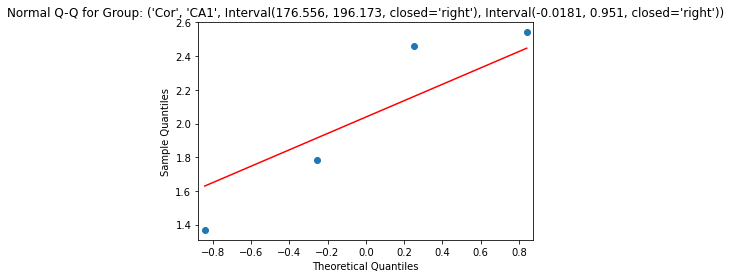

<Figure size 432x288 with 0 Axes>

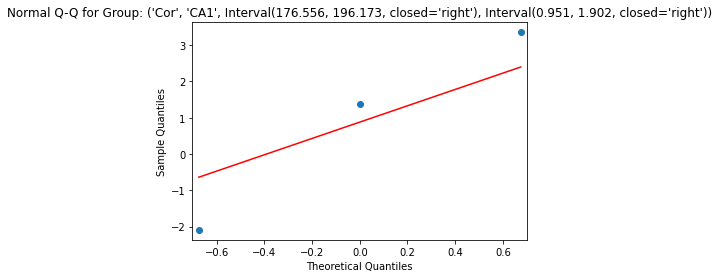

<Figure size 432x288 with 0 Axes>

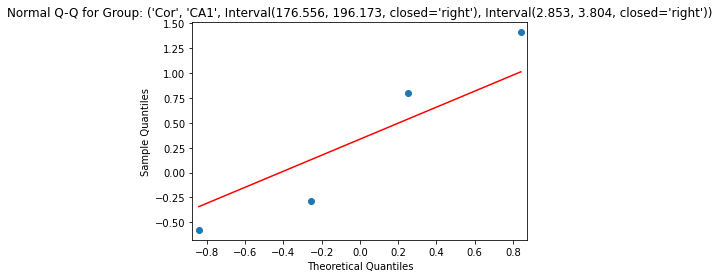

<Figure size 432x288 with 0 Axes>

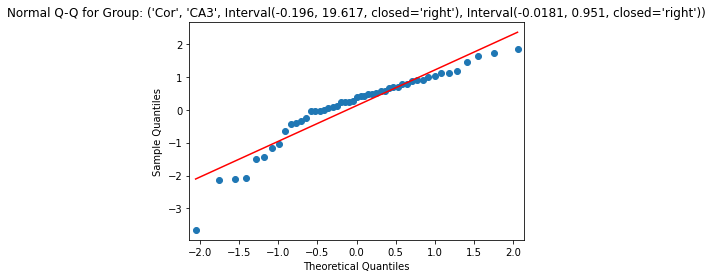

<Figure size 432x288 with 0 Axes>

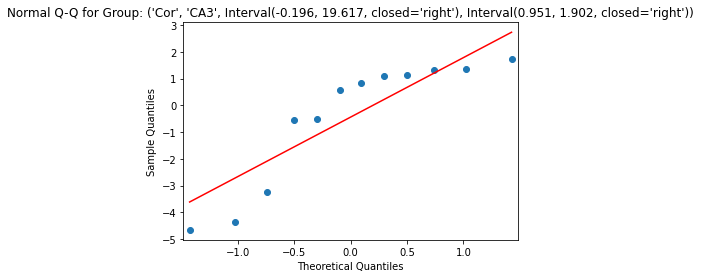

<Figure size 432x288 with 0 Axes>

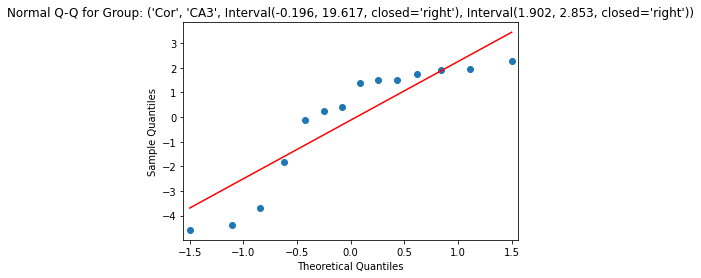

<Figure size 432x288 with 0 Axes>

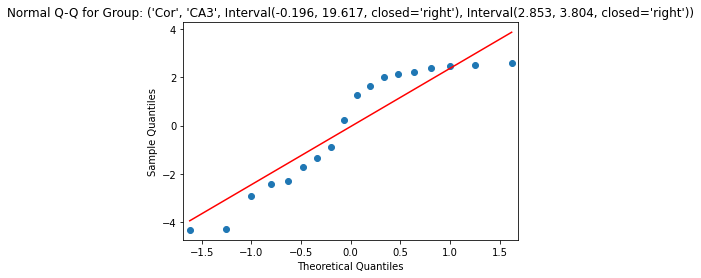

<Figure size 432x288 with 0 Axes>

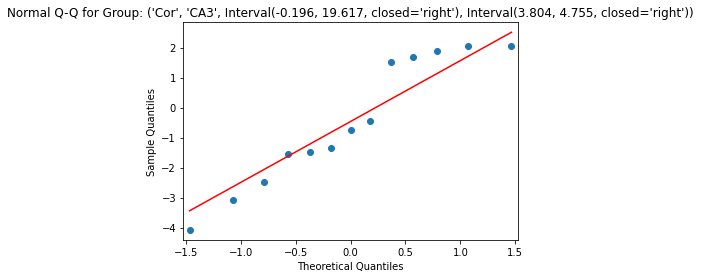

<Figure size 432x288 with 0 Axes>

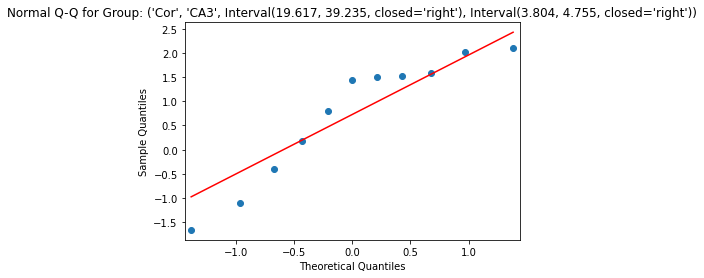

<Figure size 432x288 with 0 Axes>

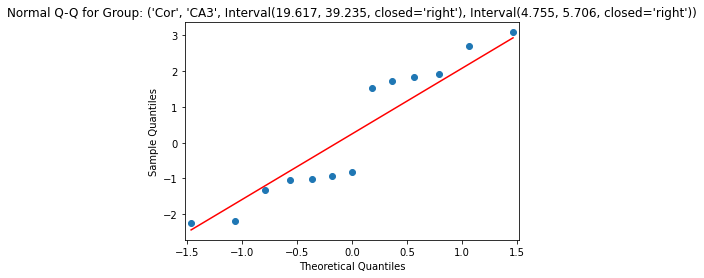

<Figure size 432x288 with 0 Axes>

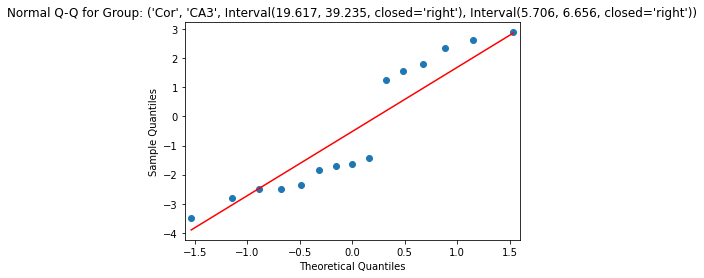

<Figure size 432x288 with 0 Axes>

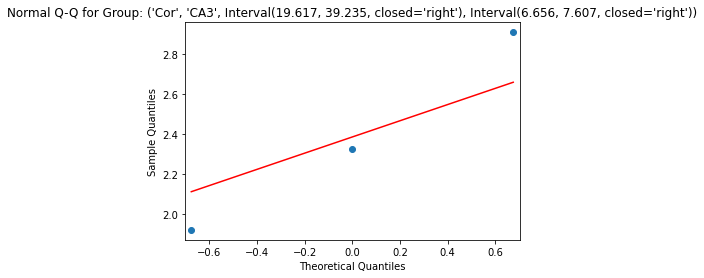

<Figure size 432x288 with 0 Axes>

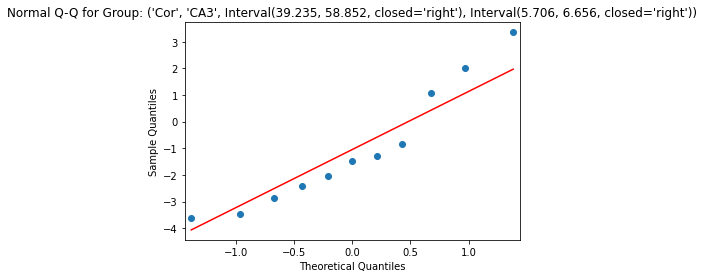

<Figure size 432x288 with 0 Axes>

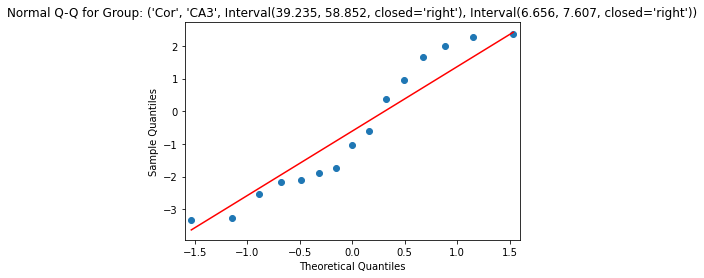

<Figure size 432x288 with 0 Axes>

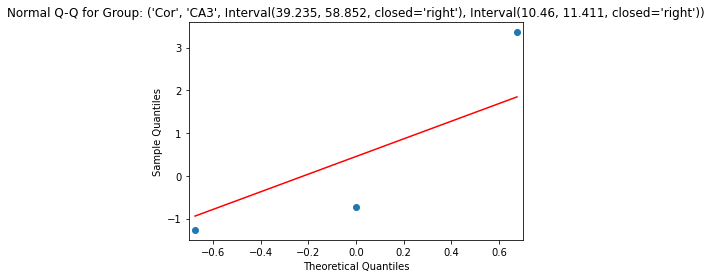

<Figure size 432x288 with 0 Axes>

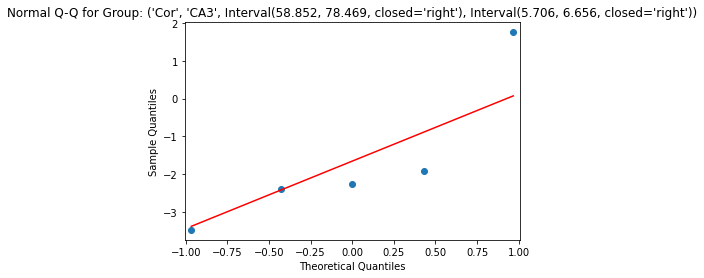

<Figure size 432x288 with 0 Axes>

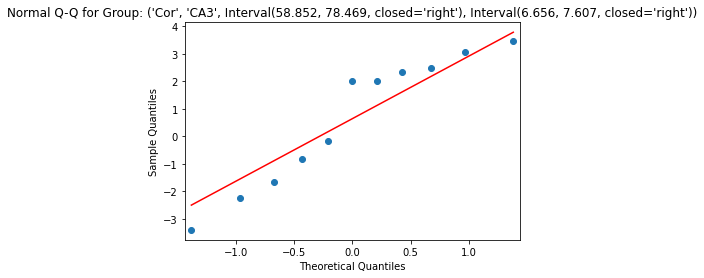

<Figure size 432x288 with 0 Axes>

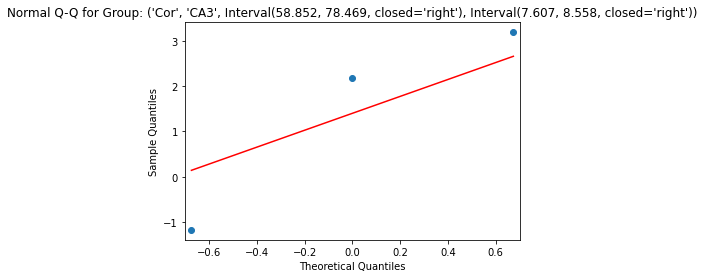

<Figure size 432x288 with 0 Axes>

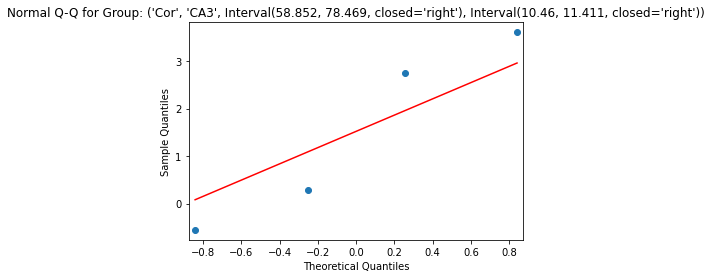

<Figure size 432x288 with 0 Axes>

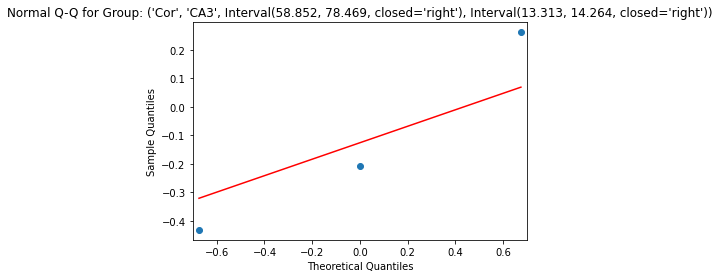

<Figure size 432x288 with 0 Axes>

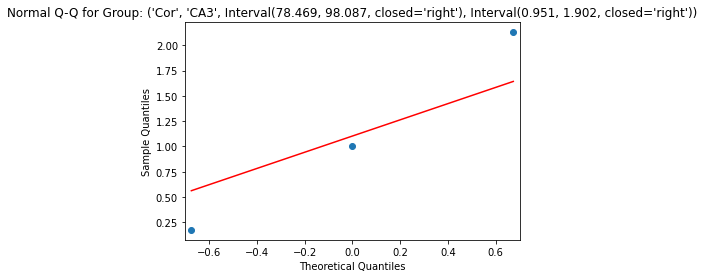

<Figure size 432x288 with 0 Axes>

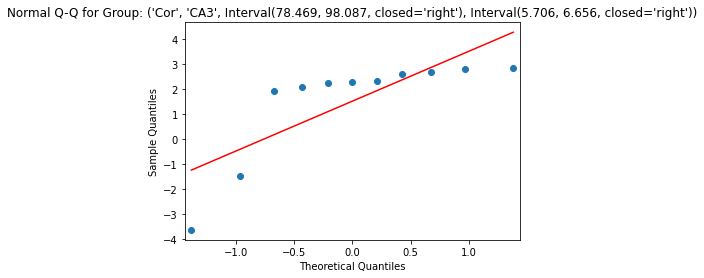

<Figure size 432x288 with 0 Axes>

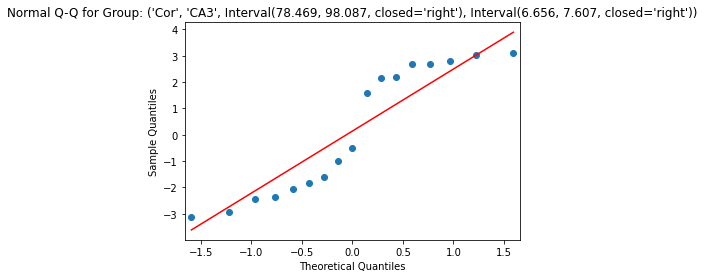

<Figure size 432x288 with 0 Axes>

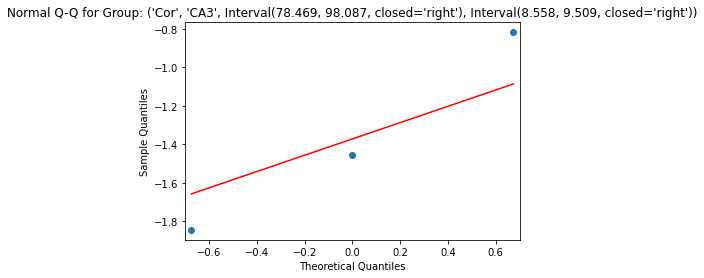

<Figure size 432x288 with 0 Axes>

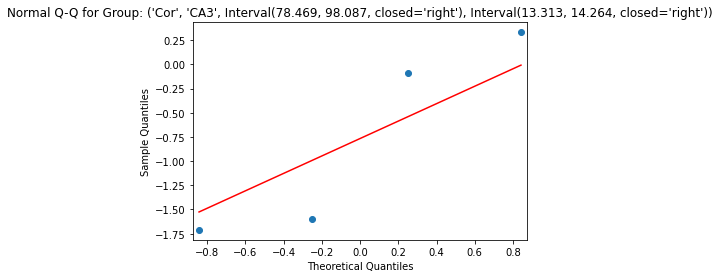

<Figure size 432x288 with 0 Axes>

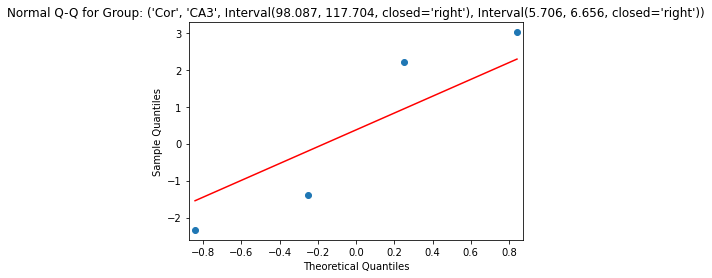

<Figure size 432x288 with 0 Axes>

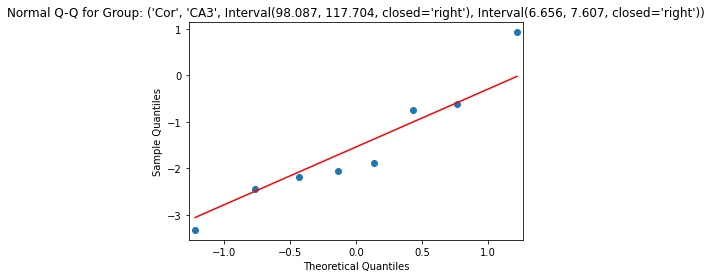

<Figure size 432x288 with 0 Axes>

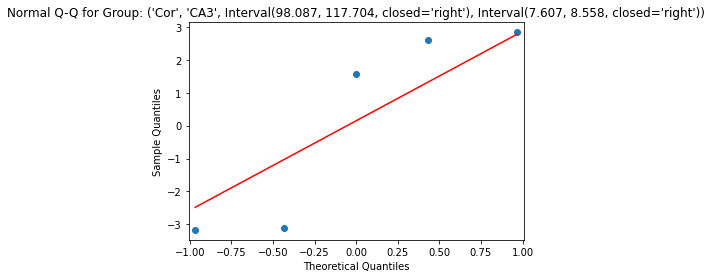

<Figure size 432x288 with 0 Axes>

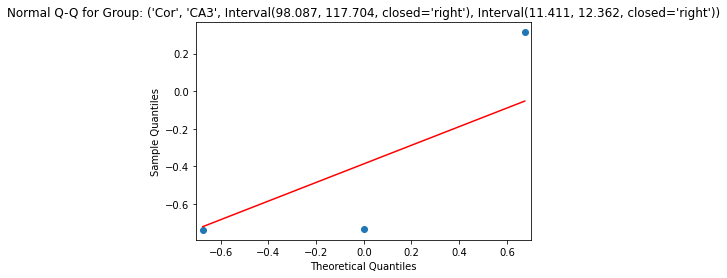

<Figure size 432x288 with 0 Axes>

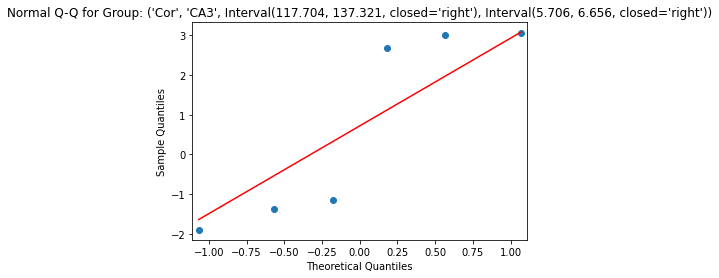

<Figure size 432x288 with 0 Axes>

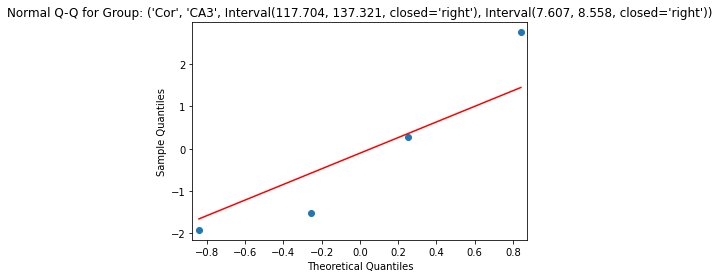

<Figure size 432x288 with 0 Axes>

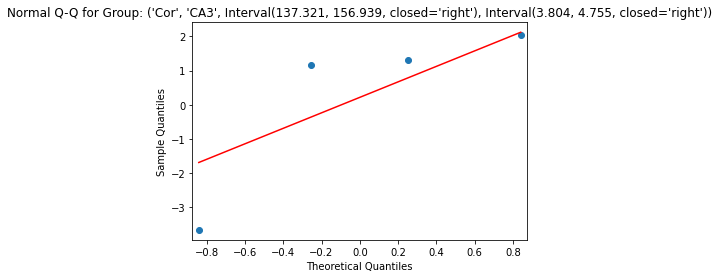

<Figure size 432x288 with 0 Axes>

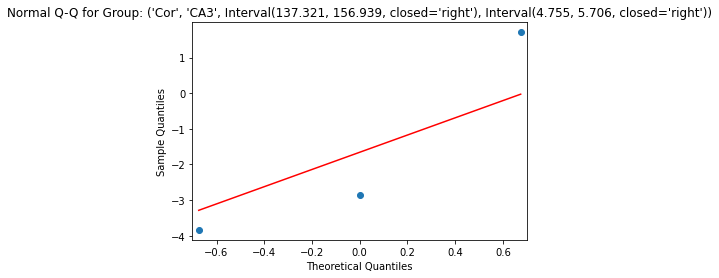

<Figure size 432x288 with 0 Axes>

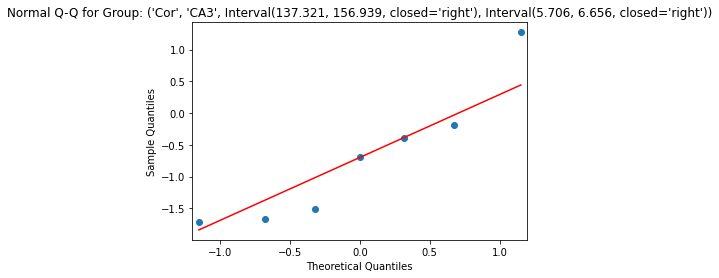

<Figure size 432x288 with 0 Axes>

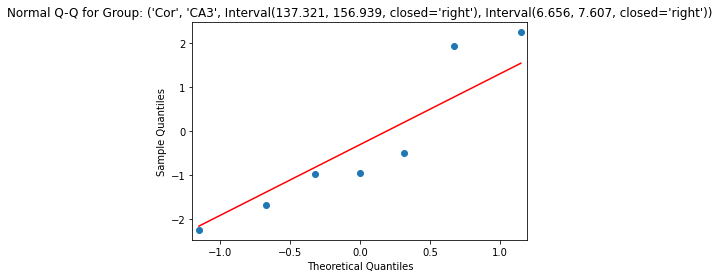

<Figure size 432x288 with 0 Axes>

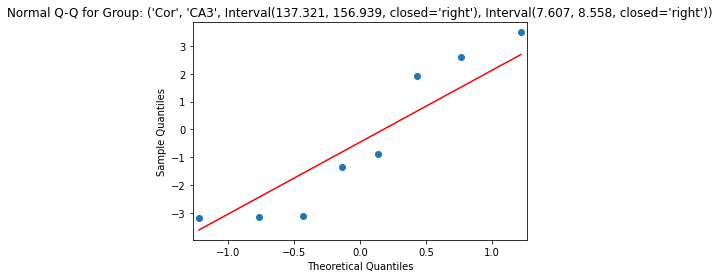

<Figure size 432x288 with 0 Axes>

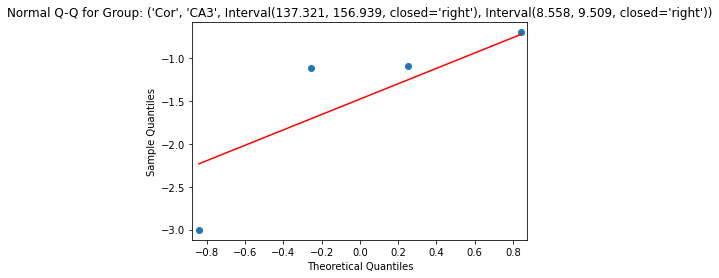

<Figure size 432x288 with 0 Axes>

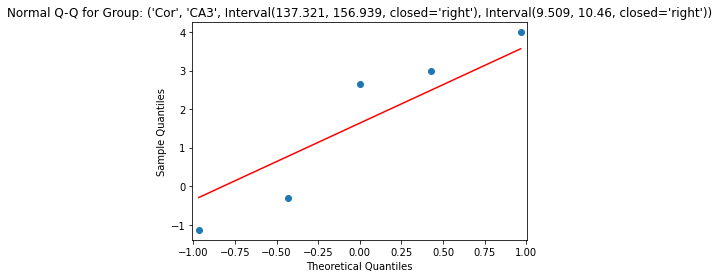

<Figure size 432x288 with 0 Axes>

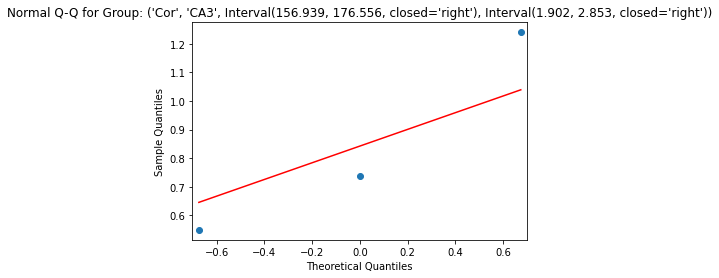

<Figure size 432x288 with 0 Axes>

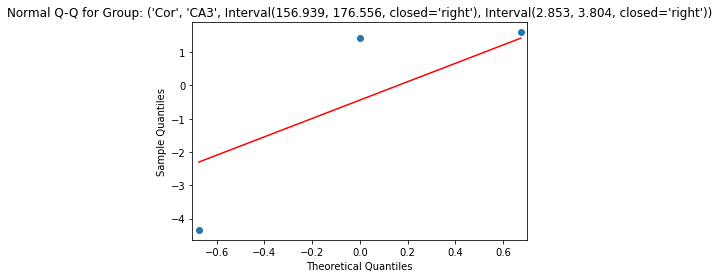

<Figure size 432x288 with 0 Axes>

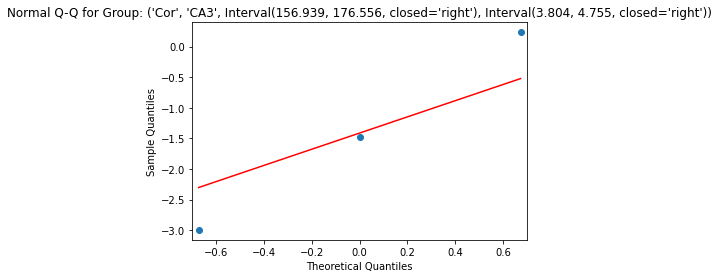

<Figure size 432x288 with 0 Axes>

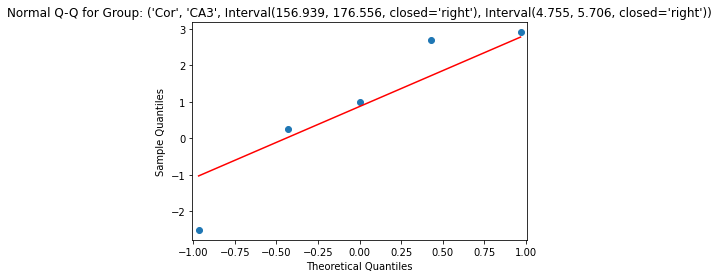

<Figure size 432x288 with 0 Axes>

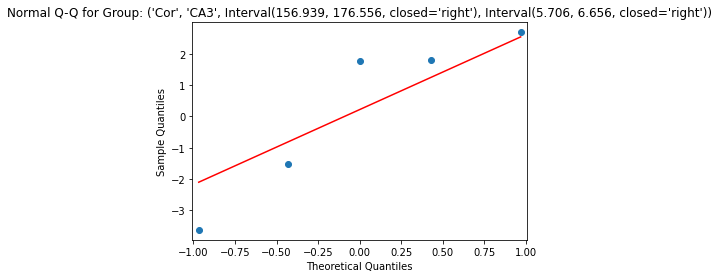

<Figure size 432x288 with 0 Axes>

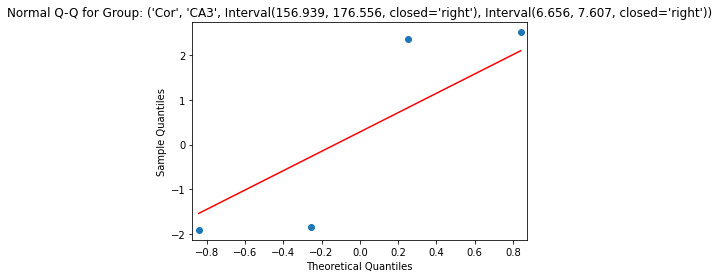

<Figure size 432x288 with 0 Axes>

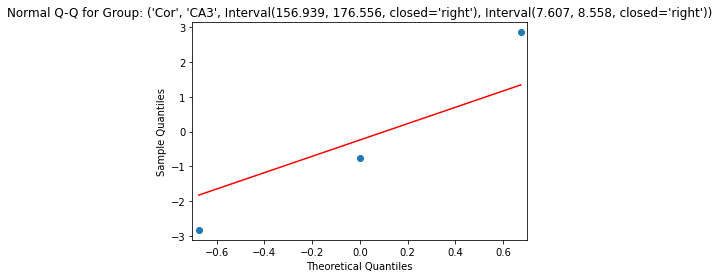

<Figure size 432x288 with 0 Axes>

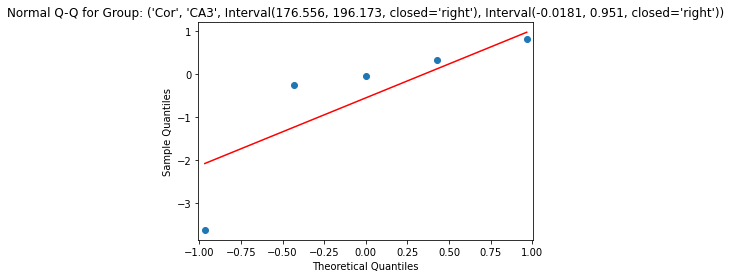

<Figure size 432x288 with 0 Axes>

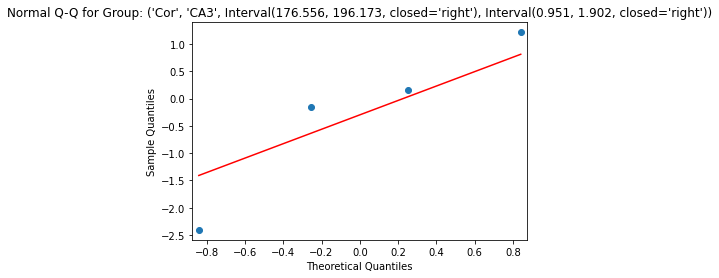

<Figure size 432x288 with 0 Axes>

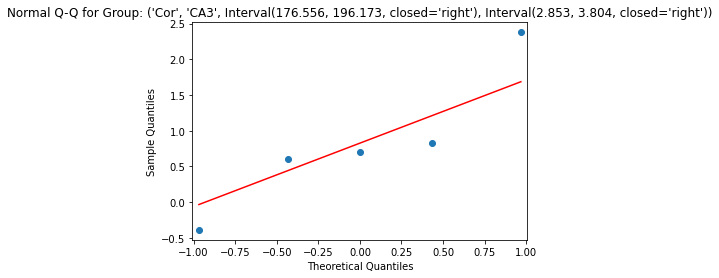

<Figure size 432x288 with 0 Axes>

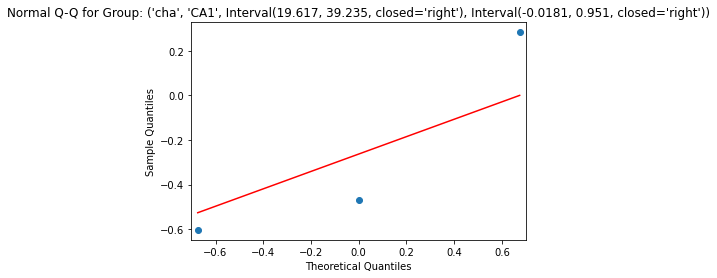

<Figure size 432x288 with 0 Axes>

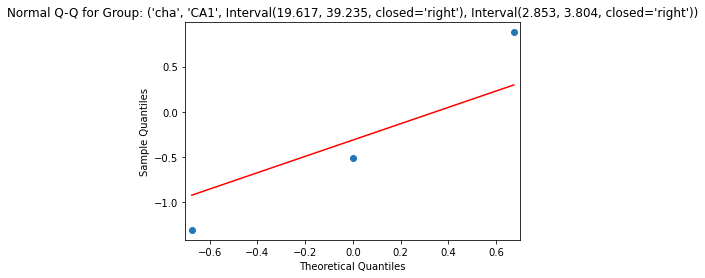

<Figure size 432x288 with 0 Axes>

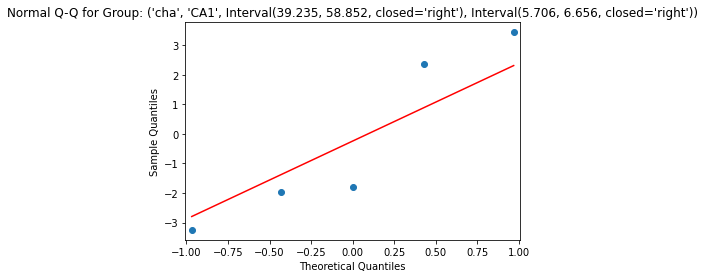

<Figure size 432x288 with 0 Axes>

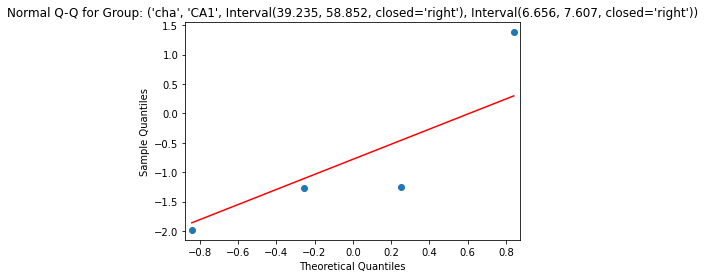

<Figure size 432x288 with 0 Axes>

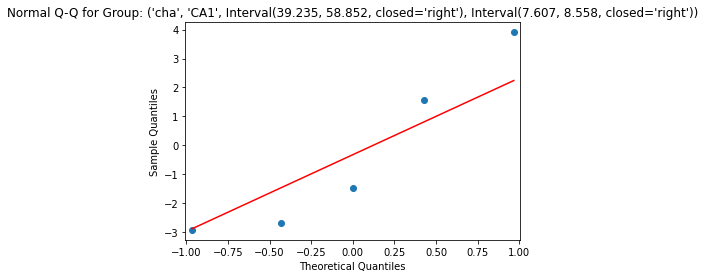

<Figure size 432x288 with 0 Axes>

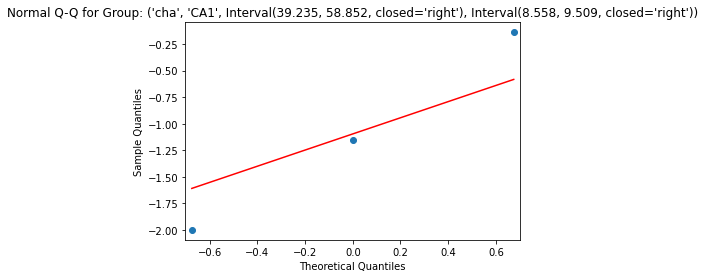

<Figure size 432x288 with 0 Axes>

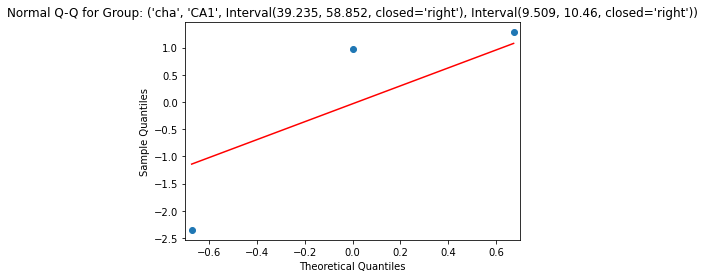

<Figure size 432x288 with 0 Axes>

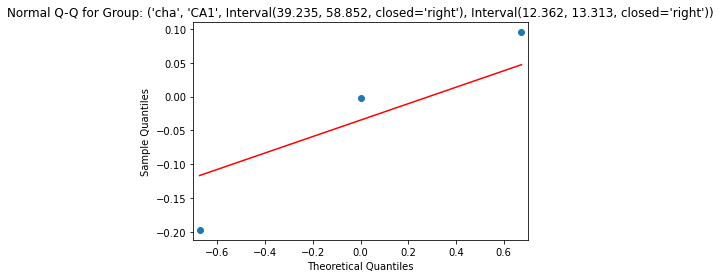

<Figure size 432x288 with 0 Axes>

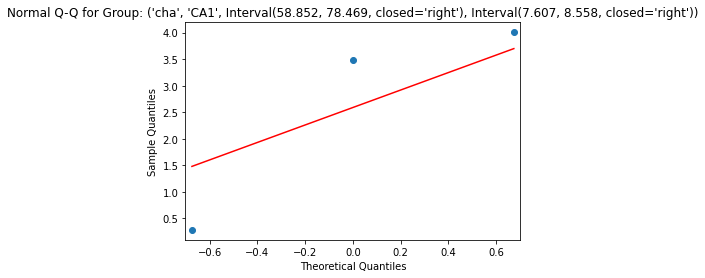

<Figure size 432x288 with 0 Axes>

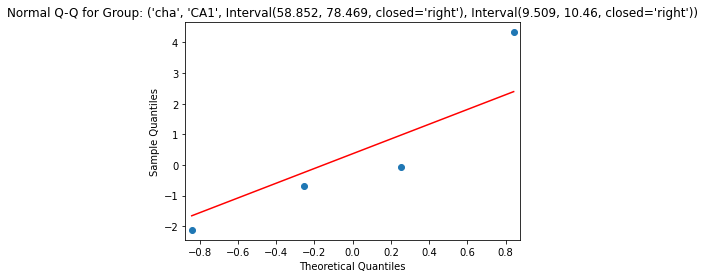

<Figure size 432x288 with 0 Axes>

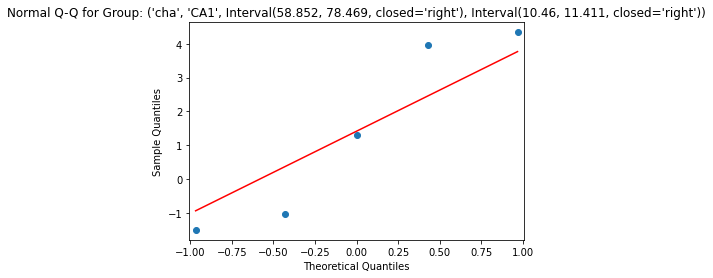

<Figure size 432x288 with 0 Axes>

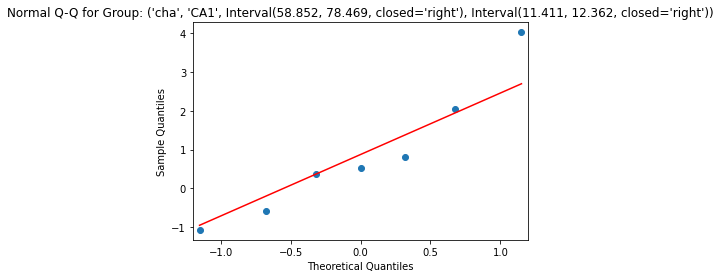

<Figure size 432x288 with 0 Axes>

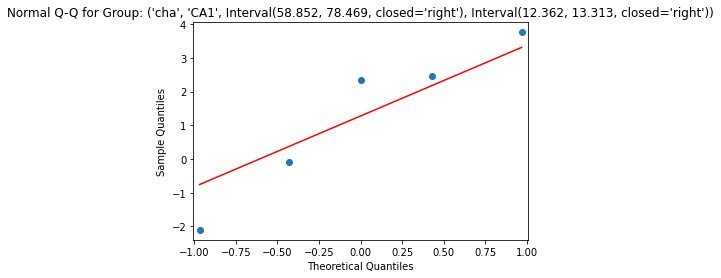

<Figure size 432x288 with 0 Axes>

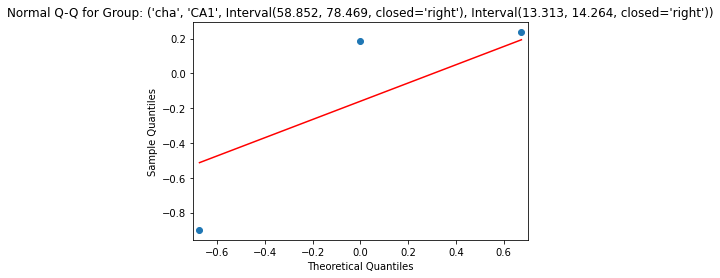

<Figure size 432x288 with 0 Axes>

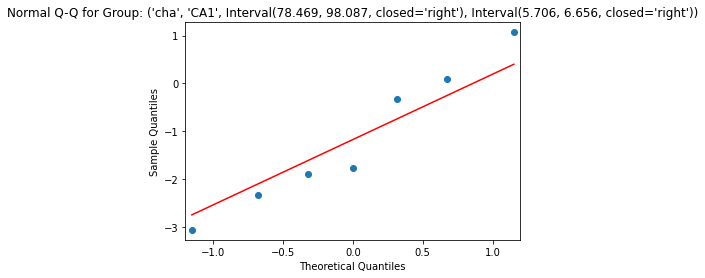

<Figure size 432x288 with 0 Axes>

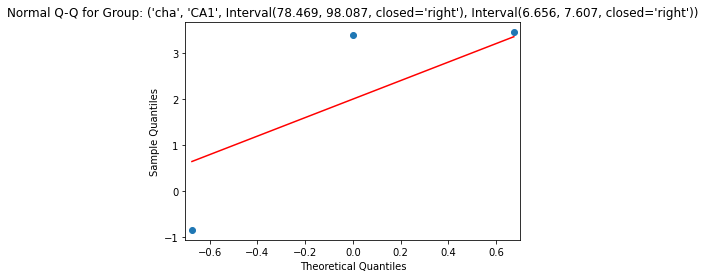

<Figure size 432x288 with 0 Axes>

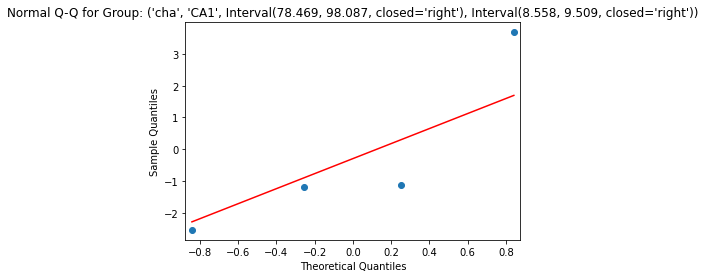

<Figure size 432x288 with 0 Axes>

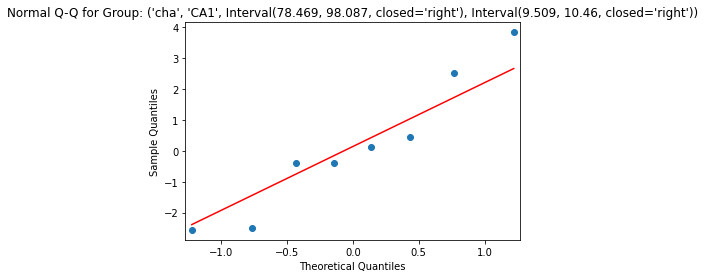

<Figure size 432x288 with 0 Axes>

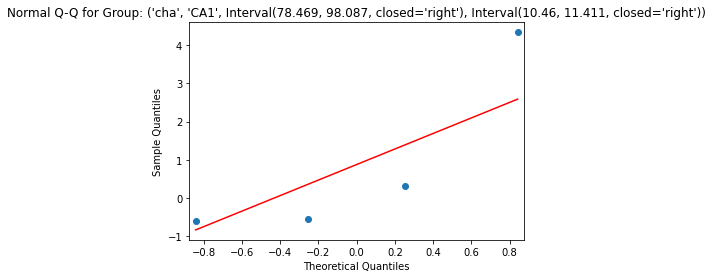

<Figure size 432x288 with 0 Axes>

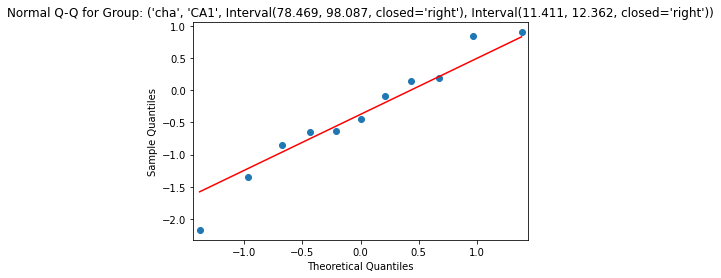

<Figure size 432x288 with 0 Axes>

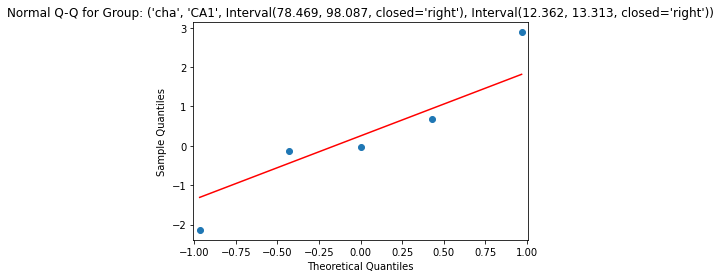

<Figure size 432x288 with 0 Axes>

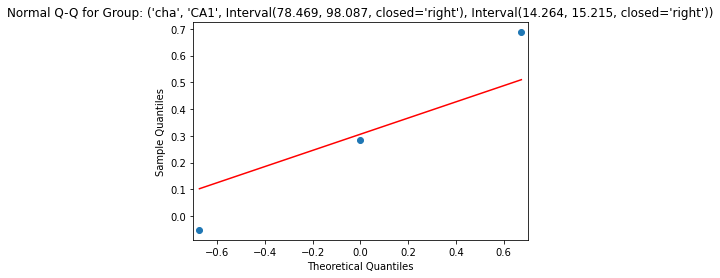

<Figure size 432x288 with 0 Axes>

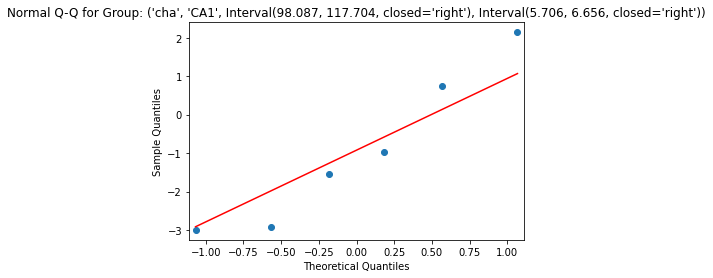

<Figure size 432x288 with 0 Axes>

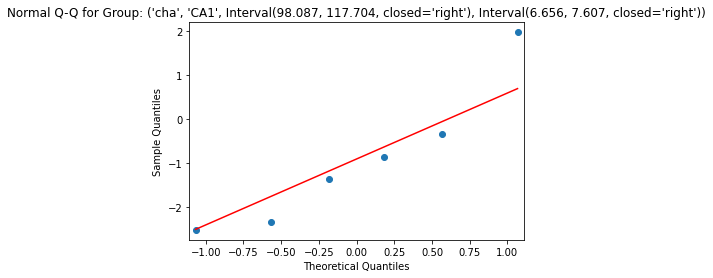

<Figure size 432x288 with 0 Axes>

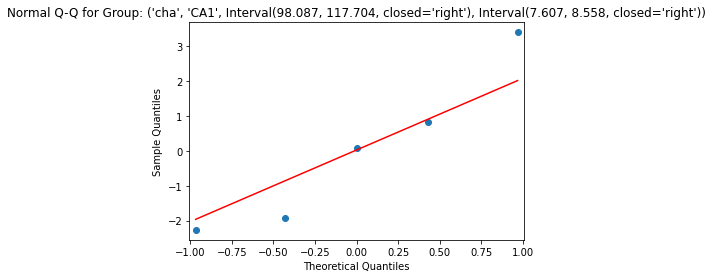

<Figure size 432x288 with 0 Axes>

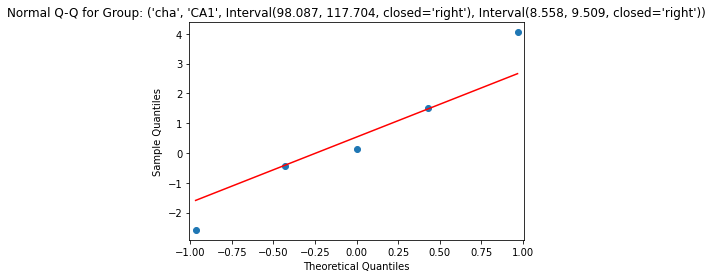

<Figure size 432x288 with 0 Axes>

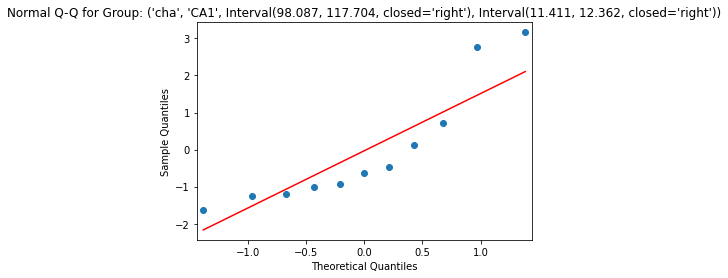

<Figure size 432x288 with 0 Axes>

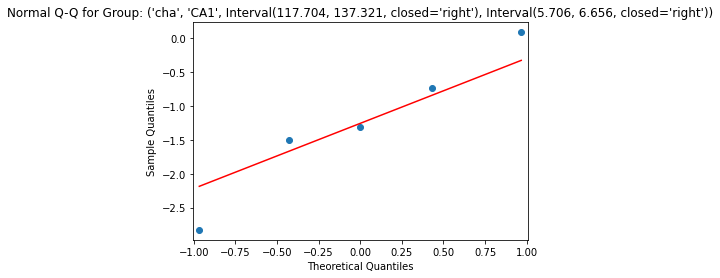

<Figure size 432x288 with 0 Axes>

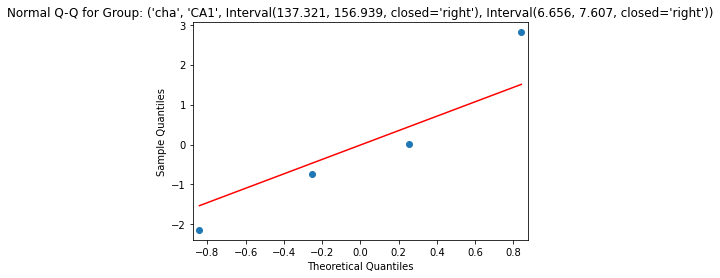

<Figure size 432x288 with 0 Axes>

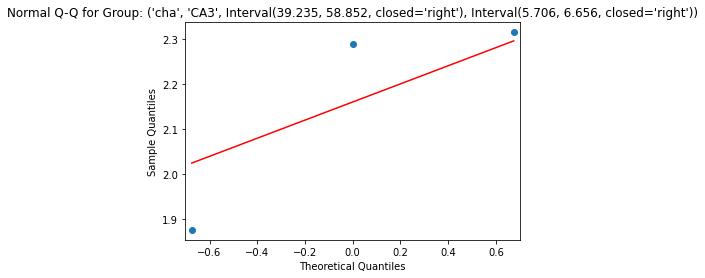

<Figure size 432x288 with 0 Axes>

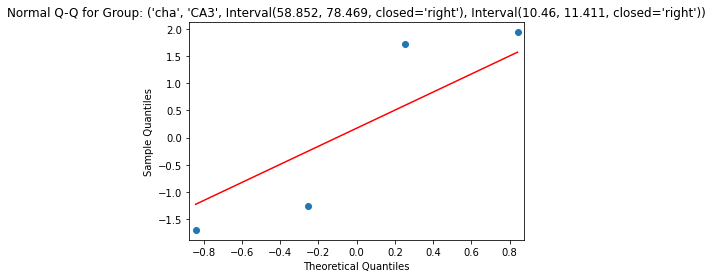

<Figure size 432x288 with 0 Axes>

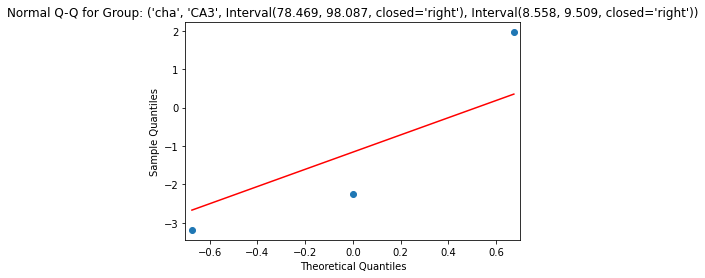

<Figure size 432x288 with 0 Axes>

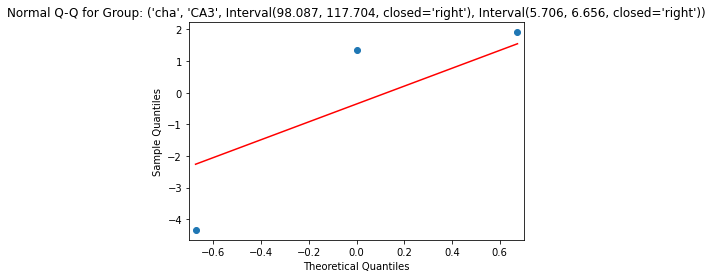

<Figure size 432x288 with 0 Axes>

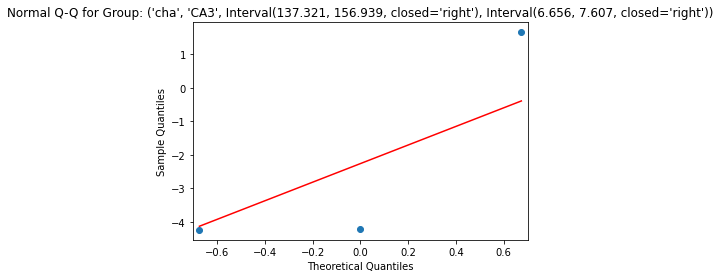

In [71]:
from scipy.stats import shapiro, iqr
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import anderson, levene
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd
import seaborn as sns

def calculate_freedman_diaconis_bins(data):
    data_iqr = iqr(data)
    n = len(data)
    bin_width = 2 * (data_iqr / np.cbrt(n))
    if bin_width == 0:
        return 1
    num_bins = int((max(data) - min(data)) / bin_width)
    return num_bins

def check_mixed_model_assumptions(fit_result, data, dependent_var, predictors):
    residuals = fit_result.resid
    fitted_vals = fit_result.fittedvalues
    
    if not data.index.unique().equals(residuals.index.unique()):
        raise IndexError('The index order is shuffled')
    
    data_with_residuals = data.copy()
    data_with_residuals['residuals'] = residuals.values

    # Binning continuous variables using Freedman-Diaconis rule
    data_with_residuals['linear_distance_bin'] = pd.cut(data_with_residuals['linear_distance'], bins=calculate_freedman_diaconis_bins(data_with_residuals['linear_distance']))
    data_with_residuals['linear_speed_bin'] = pd.cut(data_with_residuals['linear_speed'], bins=calculate_freedman_diaconis_bins(data_with_residuals['linear_speed']))
    
    grouped = data_with_residuals.groupby(['animal', 'area', 'linear_distance_bin', 'linear_speed_bin'])
    residual_groups = []
    
    for name, group in grouped:
        if len(group['residuals']) >= 3:  # Shapiro-Wilk test requires at least 3 data points
            shapiro_test_stat, shapiro_p_value = shapiro(group['residuals'])
            print(f"Group: {name}, Shapiro-Wilk test for normality: Test Statistic = {shapiro_test_stat}, p-value = {shapiro_p_value}")

            # QQ-Plot for each group
            plt.figure()
            qqplot(group['residuals'], line='s')
            plt.title(f'Normal Q-Q for Group: {name}')
            
            residual_groups.append(group['residuals'])
    
    # Levene's test for homoscedasticity
    levene_test_stat, levene_p_value = levene(*residual_groups)
    print(f"Levene's test for homoscedasticity: Test Statistic = {levene_test_stat}, p-value = {levene_p_value}")

     
    X = data[predictors].copy()  # Use copy() to avoid SettingWithCopyWarning
    
    # Identify numeric and categorical columns
    numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = list(set(X.columns) - set(numeric_cols))
    
    # One-hot encode only categorical variables
    if categorical_cols:
        X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
    
    # Remove rows with missing or infinite values
    X = X.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Convert Boolean columns to integers
    X = X * 1  # This will convert True to 1 and False to 0

    if X.empty:
        print("After cleaning, the data frame for VIF calculation is empty. Skipping VIF calculation.")
        return
    
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    
    print("Variance Inflation Factors:")
    print(vif_data)

check_mixed_model_assumptions(fit_result_ml, filtered_df, dependent_var='distance_to_criticality', predictors=['area', 'linear_distance', 'linear_speed'])

    
